# Credit Risk Project

#### This project is based on the Credit Risk Dataset I found on Kaggle.com <br>
Link to dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset <br>
The data description could be found below:

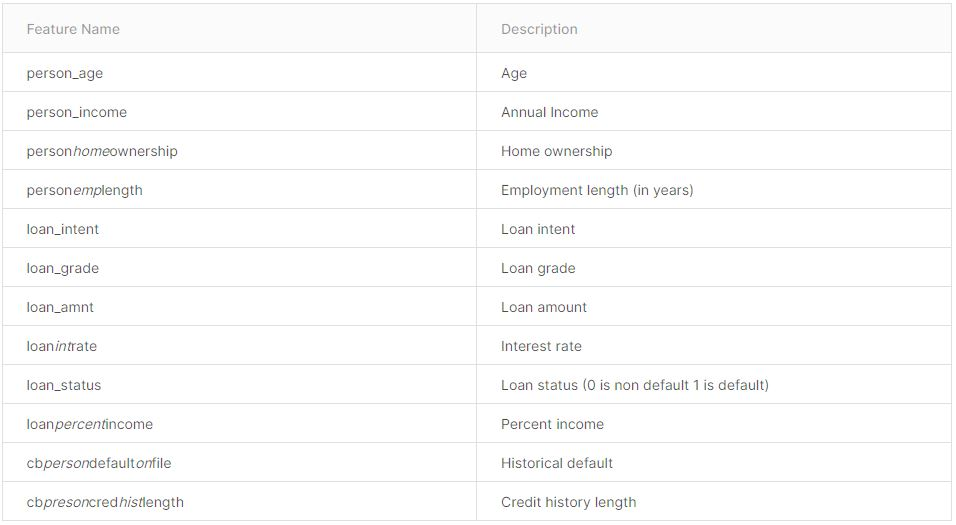

In [99]:
import numpy as np # linear algeabra
import pandas as pd # Data processing
import matplotlib as plt # Visualizations
import seaborn as sns # Statistical visualizations
import graphviz
%matplotlib inline

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#### Checking and fixing null values 
*I decided to use the mean of person_emp_length and loan_int_rate* <br>
*to fill in the null values of each column*

In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

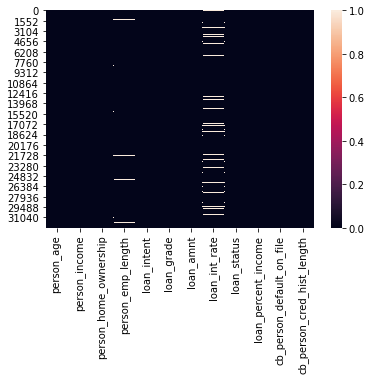

In [6]:
sns.heatmap(df.isnull())

In [7]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

<AxesSubplot:>

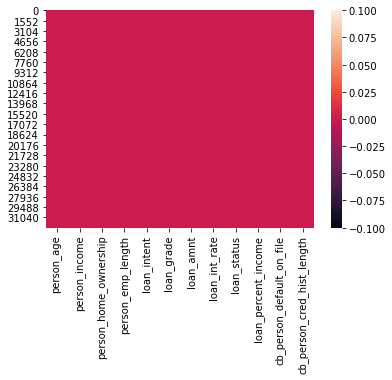

In [8]:
sns.heatmap(df.isnull())

#### Checking for outliers
*From checking the statistics from the describe function, we see there may be several outliers*

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

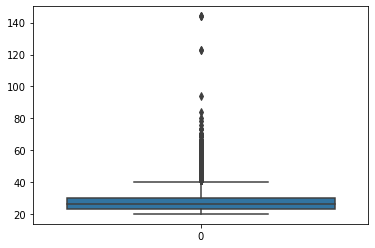

In [10]:
sns.boxplot(data=df.person_age)

<AxesSubplot:>

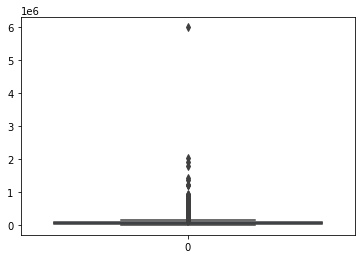

In [11]:
sns.boxplot(data=df.person_income)

To properly remove any outliers, I decided to replace the outliers with the 10th and 90th percentile of all entries.
- First for persons age:

In [12]:
ten_percent = np.percentile(df.person_age,10)
ninety_percent = np.percentile(df.person_age,90)
print(ten_percent, ninety_percent)

22.0 36.0


In [13]:
a = np.where(df.person_age < ten_percent, ten_percent, df.person_age )

In [14]:
b = np.where(a > ninety_percent, ninety_percent, a )

In [15]:
df['person_age'] = b

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.174273,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,4.563603,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,22.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,36.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

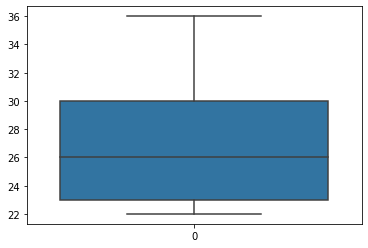

In [17]:
sns.boxplot(data=df.person_age)

- Now for person's income

In [18]:
ten_percent = np.percentile(df.person_income,10)
ninety_percent = np.percentile(df.person_income,90)
print(ten_percent, ninety_percent)

28590.0 110004.0


In [19]:
a = np.where(df.person_income < ten_percent, ten_percent, df.person_income )

In [20]:
b = np.where(a > ninety_percent, ninety_percent, a )

In [21]:
df['person_income'] = b

In [22]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.174273,60990.670176,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,4.563603,26341.966647,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,22.000000,28590.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,36.000000,110004.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

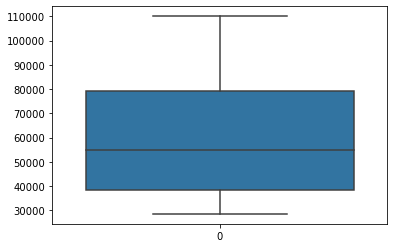

In [23]:
sns.boxplot(data=df.person_income)

### EDA

In [24]:
from matplotlib import rcParams

### 1. Checking why are people taking out these loans

In [26]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

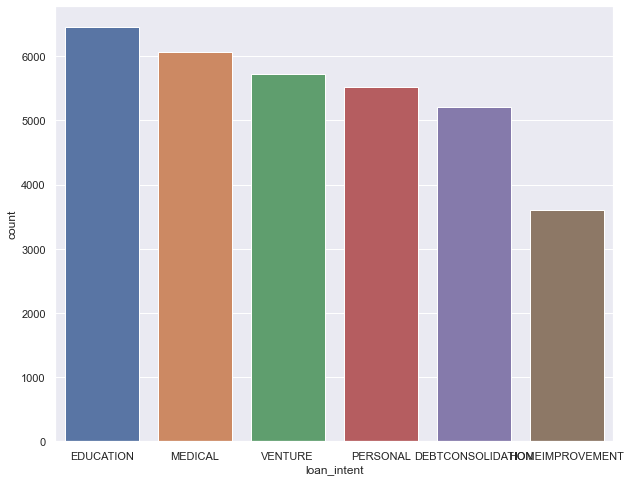

In [51]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_intent'], order=df['loan_intent'].value_counts().index)


#### 2. Checking Default Rates for Each Category

#### - 3.1 Loan Intent

<AxesSubplot:xlabel='loan_status', ylabel='count'>

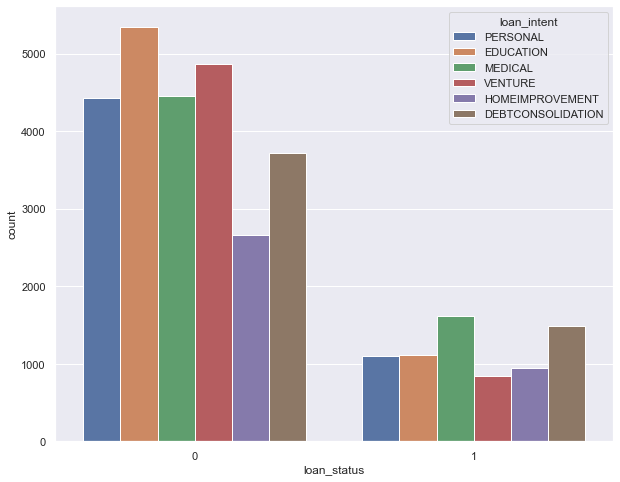

In [46]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_status'], hue = df['loan_intent'])

#### - 3.2 Age

<AxesSubplot:xlabel='loan_status', ylabel='count'>

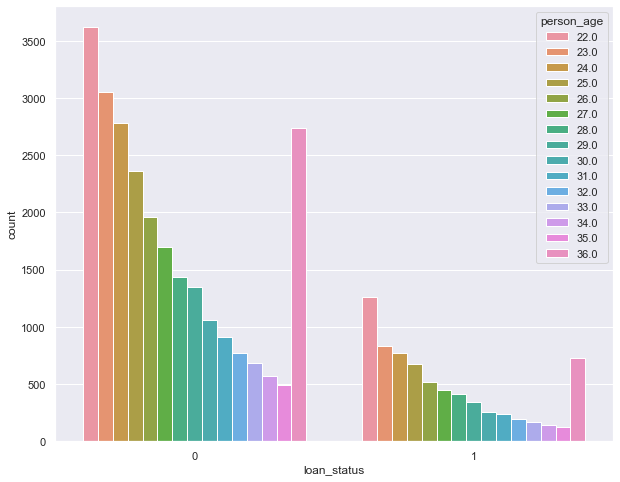

In [47]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_status'], hue = df['person_age'])

#### - 3.3 Homeownership

<AxesSubplot:xlabel='loan_status', ylabel='count'>

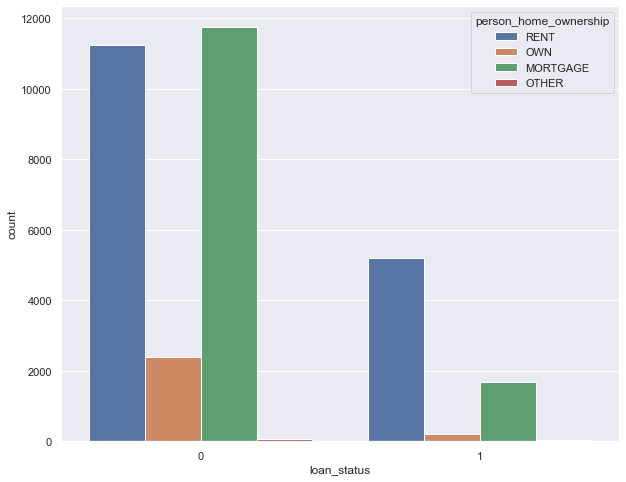

In [52]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_status'], hue = df['person_home_ownership'])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

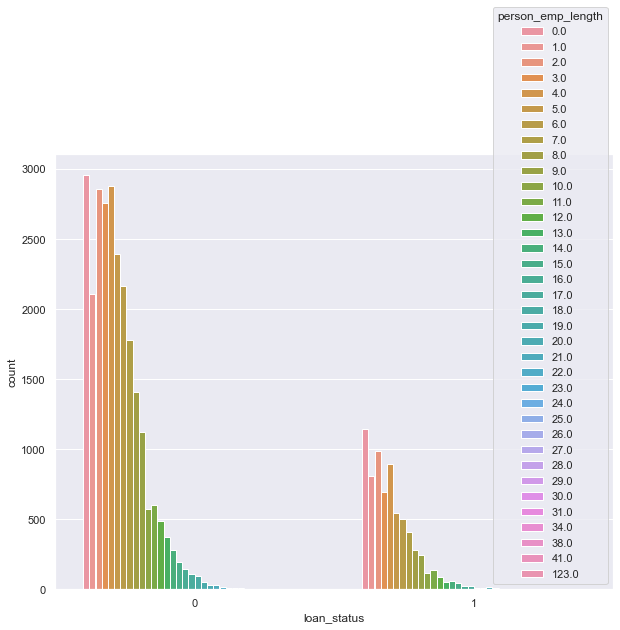

In [71]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_status'], hue = df['person_emp_length'])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

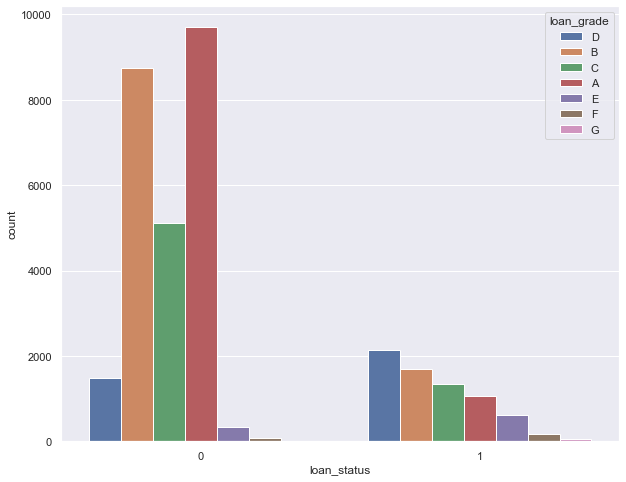

In [55]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_status'], hue = df['loan_grade'])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

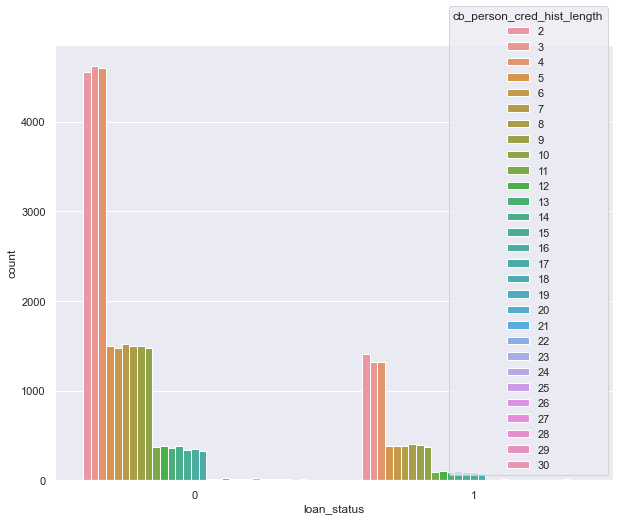

In [83]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_status'], hue = df['cb_person_cred_hist_length'])

In [84]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

#### Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df.drop(['loan_status'],axis=1)

In [87]:
X = pd.get_dummies(X)

In [88]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22.0,59000.0,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,22.0,28590.0,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25.0,28590.0,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23.0,65500.0,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24.0,54400.0,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,36.0,53000.0,1.0,5800,13.16,0.11,30,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,36.0,110004.0,4.0,17625,7.49,0.15,19,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,36.0,76000.0,3.0,35000,10.99,0.46,28,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,36.0,110004.0,5.0,15000,11.48,0.10,26,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [89]:
y = df['loan_status']

In [102]:
y = pd.get_dummies(y,drop_first=True)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [95]:
dtree = DecisionTreeClassifier()

In [96]:
dtree2 = dtree.fit(X_train,y_train)

In [104]:
predictions = dtree.predict(X_test)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6992  621]
 [ 513 1649]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7613
           1       0.73      0.76      0.74      2162

    accuracy                           0.88      9775
   macro avg       0.83      0.84      0.83      9775
weighted avg       0.89      0.88      0.88      9775



### Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rfc = RandomForestClassifier(n_estimators=200)

In [109]:
rfc.fit(X_train,y_train)

<ipython-input-109-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [110]:
rfc_pred = rfc.predict(X_test)

In [111]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[7562   51]
 [ 645 1517]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7613
           1       0.97      0.70      0.81      2162

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.88      9775
weighted avg       0.93      0.93      0.92      9775



### Logistic Regression

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
LRdf = scaler.fit_transform(df[['person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income']])

In [116]:
LRdf = pd.DataFrame(LRdf,columns = ['person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income'] )
LRdf.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,0.397974,0.038764,0.263460,0.314024,0.205064
std,0.323556,0.033231,0.183249,0.173124,0.128653
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.121724,0.016260,0.130435,0.172472,0.108434
50%,0.324391,0.032520,0.217391,0.312921,0.180723
75%,0.621638,0.056911,0.339130,0.432022,0.277108
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
df1 = df

In [120]:
df1['person_income'] = LRdf['person_income']
df1['person_emp_length'] = LRdf['person_emp_length']
df1['loan_amnt'] = LRdf['loan_amnt']
df1['loan_int_rate'] = LRdf['loan_int_rate']
df1['loan_percent_income'] = LRdf['loan_percent_income']

In [121]:
X = df1.drop(['loan_status'],axis=1)
y = df1['loan_status']

In [122]:
X = pd.get_dummies(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel = LogisticRegression()

In [126]:
logmodel.fit(X_train,y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
predictions = logmodel.predict(X_test)

In [128]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[7266  347]
 [ 996 1166]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7613
           1       0.77      0.54      0.63      2162

    accuracy                           0.86      9775
   macro avg       0.83      0.75      0.77      9775
weighted avg       0.86      0.86      0.85      9775



In [ ]:
#### DO CLUSTERING